# Linear regression


In [1]:
#libraries
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

In [2]:
#@title Interactive plot
sns.set()
sns.set_context("talk")


def plot_regression(slope, intercept):
    # Fixing the seed of the random number generator for reproducibility of the fake data
    np.random.seed(50)
    x = np.arange(1, 101)
    y = 3 * x + 20 + np.random.normal(0, 30, 100)
    y_pred = slope * x + intercept
    mse = np.mean((y-y_pred)**2)
    plt.plot(x, y, "o")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Scatter plot with the regression line")

    # We define two points to construct the line. Every line is defined by two points.
    x1, y1 = 0, intercept
    x2, y2 = 100, intercept + slope * 100
    l1 = [(x1, y1), (x2,y2)]
    
    lc = LineCollection([l1], color=["black"], lw=2)

    plt.gca().add_collection(lc)

    plt.show()
    
    print("The mean squared error (MSE) is: {:.2f} cm2".format(mse))
    print("The root mean square (RMSE) is: {:.2f} cm".format(np.sqrt(mse)))
    
#interactive_plot = interactive(plot_regression, alpha=(0,30), beta=(-100,100))
interactive_plot = interactive(plot_regression, slope=widgets.FloatSlider(min=0, max=40, step=0.5, value=0), 
                               intercept=widgets.FloatSlider(min=0, max=200, step=10, value=200))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='slope', max=40.0, step=0.5), FloatSlider(value=200.0…

## Obtaining the model with Ordinary Least Squares

Let's type the equations with python

Values needed:

* $\bar{x}$
* $\bar{y}$
* $\bar{xy}$
* $\bar{x}^{2}$
* $\bar{x^{2}}$

$ \hat{y_{i}}=a+b*x_{i} $

$a = \bar{y} - \bar{x}\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$

$b=\frac{(\bar{xy}-\bar{x}\bar{y})}{(\bar{x^{2}}-\bar{x}^{2})}$


In [3]:
# Replicating the data
np.random.seed(50)
x = np.arange(1, 101)
y = 3 * x + 20 + np.random.normal(0, 30, 100)

In [4]:
# Slope
b = ( np.mean(x*y) - ( np.mean(x) * np.mean(y) ) ) / ( np.mean( np.power(x, 2) ) - np.power( np.mean(x), 2) )
# Intercept
a = np.mean(y) - ( np.mean(x) * b )

print("The slope is: {:.2f}".format(b))
print("The intercerpt is: {:.2f}".format(a))

The slope is: 2.92
The intercerpt is: 25.11


### Making predictions

In [5]:
#Making predictions for actual data


In [6]:
# Prediction for new data (x = 41)
# b * 41 + a 
print("The prediction for 41 is: {:.2f}".format(b * 41 + a))

The prediction for 41 is: 144.94


In [7]:
# Prediction for new data (x  = 20)
print("The prediction for 20 is: {:.2f}".format(b * 20 + a))

The prediction for 20 is: 83.56


In [8]:
x_new = np.array([41,20])
x_new

array([41, 20])

In [9]:
b * x_new + a

array([144.93728112,  83.56433097])

### Evaluating predictions

In [10]:
# Evaluating predictions
#y_pred = a + b * x 
# Compute:
y_pred = a + b * x # x is a numpy array -> y_pred a numpy array with the predicted values for every x value
# ME: mean error
ME = np.mean( y - y_pred )
print("The ME of the model is: {:.2f}".format(ME))
# MAE: mean absolute error
MAE = np.mean( np.abs( y - y_pred ) )
print("The MAE of the model is: {:.2f}".format(MAE))
# MSE: mean squared error
MSE = np.mean( np.power( y - y_pred , 2 ) )
print("The MSE of the model is: {:.2f}".format(MSE))
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
print("The RMSE of the model is: {:.2f}".format(RMSE))
# MAPE: mean absolute percentual error
MAPE = np.mean( np.abs( ( ( y - y_pred ) / y ) ) )
print("The MAPE of the model is: {:.2f} %".format(MAPE))

The ME of the model is: 0.00
The MAE of the model is: 24.22
The MSE of the model is: 1037.53
The RMSE of the model is: 32.21
The MAPE of the model is: 0.35 %


Text(0.5, 1.0, 'Histogram of residuals')

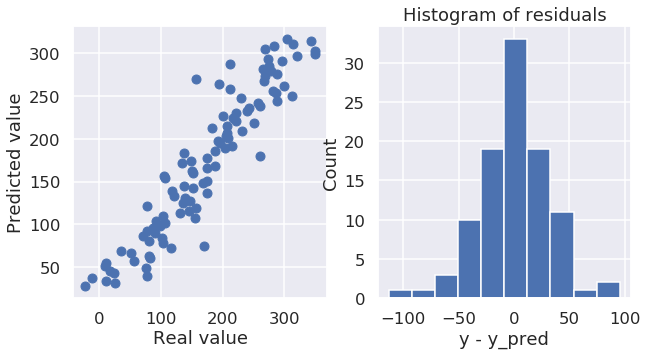

In [11]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(y,y_pred, 'o')
ax[0].set_xlabel("Real value")
ax[0].set_ylabel("Predicted value")

# Get a histogram of the residuals ie: y - y_pred. = residuals
# It resembles a normal distribution?
ax[1].hist( y - y_pred )
ax[1].set_xlabel("y - y_pred")
ax[1].set_ylabel("Count")
ax[1].set_title("Histogram of residuals")

### Plotting the linear model with seaborn

In [12]:
data = pd.DataFrame({"x":x, "y":y})
data

,x,y
0,1,-23.810563
1,2,25.070672
2,3,10.372147
3,4,-11.937415
4,5,77.358384
...,...,...
95,96,268.796797
96,97,284.306951
97,98,314.158032
98,99,342.992746


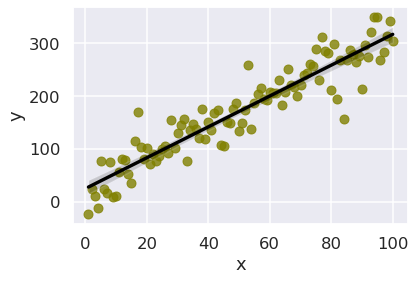

In [13]:
# sns.regplot(x =, y = , data=, scatter_kws ={'color': value}, line_kws={"color": "red"})
sns.regplot(x='x',y='y', data=data, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

## Linear regression with scipy

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

In [14]:
import scipy.stats as stats
# slope, intercept, r_value, p_value, slope_std_err, intercept_std_error = stats.linregress(x,y); where x,y are numpy arrays

reg = stats.linregress(x,y)

print("The slope is: {:.2f}".format(reg.slope))
print("The intercerpt is: {:.2f}".format(reg.intercept))

The slope is: 2.92
The intercerpt is: 25.11


In [15]:
reg.pvalue < 0.05

True

### Linear model with Scikit-Learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# create the model
linear_model = LinearRegression()

In [18]:
x.shape # 

(100,)

In [19]:
x.reshape(-1,1).shape

(100, 1)

In [20]:
# fit the model
linear_model.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# make predictions
linear_model.predict(np.array([[20]]))

array([[83.56433097]])

In [22]:
# The coefficients
print("The slope is: {:.2f}".format(linear_model.coef_[0][0]))
print("The intercerpt is: {:.2f}".format(linear_model.intercept_[0]))

The slope is: 2.92
The intercerpt is: 25.11


In [23]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [24]:
x.shape

(100,)

In [25]:
x.reshape(-1,1)

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [26]:
x.reshape(-1,1).shape

(100, 1)

In [27]:
x.T

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# The coefficient of determination: 1 is perfect prediction
print("The R2 of the linear model is: {:.2f}".format(r2_score(y, y_pred)))

The R2 of the linear model is: 0.87


In [30]:
# The mean squared error is
print("The mean squared error of the linear model is: {:.2f}".format(mean_squared_error(y, y_pred)))

The mean squared error of the linear model is: 1037.53


# Data splitting

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Compute again the values of the slope and the intercept.
# How do they compare with the previous values?
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
print("The slope is: {:.2f}".format(model.coef_[0][0]))
print("The intercerpt is: {:.2f}".format(model.intercept_[0]))

The slope is: 2.93
The intercerpt is: 24.23


In [32]:
import pickle

In [41]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = "sagemaker-ironhack-demo"
#bucket = Session().default_bucket() 
#prefix = 'pca'  # prefix is the subfolder within the bucket.

#Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 

role = sagemaker.get_execution_role()

In [34]:
print(role)

arn:aws:iam::999012740030:role/service-role/AmazonSageMaker-ExecutionRole-20210429T214174


In [45]:
# Now repeat this 1000 times and get the corresponding values for the slope and the intercept point estimations!
# Store the resulting values in two lists:

import os

s3 = boto3.resource('s3')

slopes = []
intercepts = []
models = []

for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
    model = LinearRegression()
    # In case of having multiple independent features: x1, x2, x3,....
    # and having y with doesn't follow a normal distribution...
    # scaler_x = StandardScaler(), PowerTransform()
    # scaler_y = StandardScaler(), PowerTransform()
    # scaler_x.fit(X_train) 
    # scaler_y.fit(y_train)
    # X_train = scaler_x.transform(X_train)
    # y_train = scaler_y.transform(y_train)
    # X_test = scaler_x.transform(X_test)
    # y_test = scaler_y.transform(y_test)
    model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
    slopes.append(model.coef_[0][0])
    intercepts.append(model.intercept_[0])
    models.append(model)
    # Saving the models locally
    filename = 'Linear_model_' + str(i) + '.pkl'
    pickle.dump(model, open(filename, 'wb'))
    # Upload models to S3
    # To upload files to S3 you need to create first a bucket which has the name:
    # 'sagemaker-' + 'your-own-name'. The name has to be gloabaly-unique.
    s3.meta.client.upload_file(filename, 'sagemaker-ironhack', filename)



In [ ]:
# Plot histograms for the slopes and the intercepts.
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(slopes)
ax[0].set_xlabel("Slopes")
ax[0].set_ylabel("Count")
ax[0].set_title("Histogram of slopes")

ax[1].hist(intercepts)
ax[1].set_xlabel("Intercepts")
ax[1].set_ylabel("Count")
ax[1].set_title("Histogram of intercepts")

In [ ]:
np.mean(slopes)

In [ ]:
np.mean(intercepts)

# Confidence intervals

Every sample for the training set we will produce another set of predicted regression coefficient. Therefore, we can ask ourselves to have a confidence interval for those coefficients. If we set 

$$\hat{y}_{i}=\hat{b}_{0}+\hat{b}_{1}x_{i}$$

A confidence interval for each coefficient can be computed as:

$$\hat{b}_{1} \pm t_{\alpha /2,n - p}* \left(\sqrt{\frac{MSE}{\sum_{i}(x_{i}-\bar{x})^{2}}}\right)$$

and 

$$\hat{b}_{0} \pm t_{\alpha /2,n - p} * \left(\sqrt{\frac{MSE}{n}}\right)$$

[see](https://online.stat.psu.edu/stat415/lesson/7/7.5)

In [ ]:
# Compute the confidence intervals for the slope and the intercept
# stats.t.ppf(1-(alpha/2),df=n-2). Confidence level standard value is 95% -> alpha = 0.05
# p = 2 because our model has two parameters: a, b
# In case of a linear model with two independent features: y = bo + b1 * x1 + b2 * x2
# we will have three parameters: bo, b1, b2 -> p = 3
tc = stats.t.ppf(1-(0.05/2),df=x.shape[0]-2)

factor1 = tc * np.sqrt( MSE / np.sum( np.power( ( x - np.mean(x) ), 2 ) ) )
#b

print("The confidence interval for the slope is: [{:.2f}, {:.2f}]".format(b - factor1 , b + factor1))

#a
factor2 = tc * np.sqrt( (MSE / x.shape[0]) )

print("The confidence interval for the intercept is: [{:.2f}, {:.2f}]".format(a - factor2 , a + factor2))